In [139]:
%matplotlib inline
import numpy as np
import matplotlib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import stats
sns.set(style="whitegrid", color_codes=True)
plt.rcParams['figure.figsize'] = (12, 6)

In [140]:
df_07_13 = pd.read_csv("../data/Spreadsheet/2017-07-13.csv")
df_08_03 = pd.read_csv("../data/Spreadsheet/2017-08-03.csv")

In [141]:
df_07_13.head()

,SPAD,NDVI
0,53.10,0.747920
1,72.91,0.805075
2,80.49,0.900775
3,71.96,0.924588
4,60.01,0.913168


In [142]:
ndvi = df_07_13["NDVI"].as_matrix()
spad = df_07_13["SPAD"].as_matrix()
ndvi = np.concatenate((ndvi, df_08_03["NDVI"].as_matrix()))
spad = np.concatenate((spad, df_08_03["SPAD"].as_matrix()))

In [143]:
stats.pearsonr(spad, ndvi)

(0.86642904226940776, 6.1121024478903002e-10)

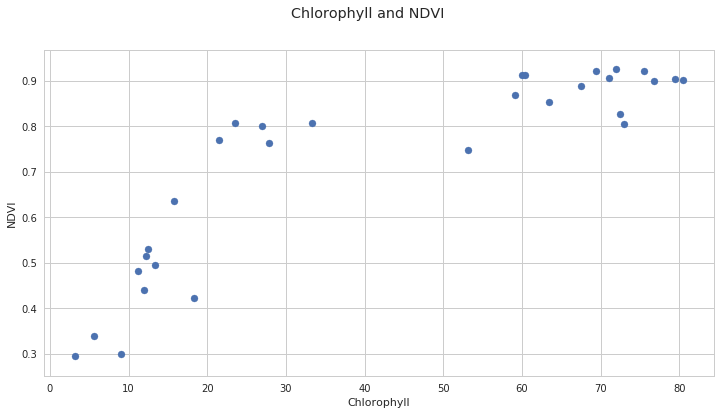

In [144]:
fig = plt.figure()
plt.scatter(spad, ndvi)
fig.suptitle("Chlorophyll and NDVI")
plt.xlabel("Chlorophyll")
plt.ylabel("NDVI")

# Linear Regression

In [154]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [155]:
def rmse(y, yhat):
    return np.sqrt(np.mean((y - yhat)**2))

In [156]:
X_train, X_valid, y_train, y_valid = train_test_split(ndvi.reshape(-1, 1), spad, test_size=0.15, random_state=101)

In [157]:
model = LinearRegression()
model.fit(X_train, y_train)
print("Training error:", rmse(y_train, model.predict(X_train)))

Training error: 13.571442755


In [158]:
print("Validation error:", rmse(y_valid, model.predict(X_valid)))

Validation error: 15.8473926985


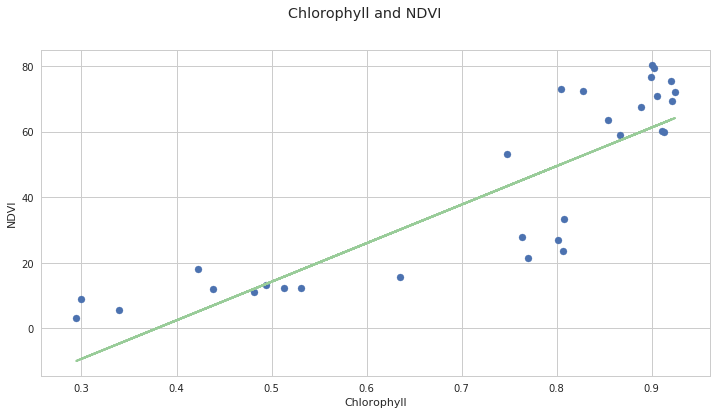

In [160]:
fig = plt.figure()
plt.scatter(ndvi, spad)
plt.plot(ndvi, model.predict(ndvi.reshape(-1, 1)), color="#99CC99", linewidth=2)
fig.suptitle("Chlorophyll and NDVI")
plt.xlabel("Chlorophyll")
plt.ylabel("NDVI")

# Polynomial Regression

In [161]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [162]:
model = Pipeline([("poly", PolynomialFeatures(degree=2)), ("linear", LinearRegression(fit_intercept=False))])
model.fit(X_train, y_train)
print("Training error:", rmse(y_train, model.predict(X_train)))

Training error: 11.8701708326


In [163]:
print("Validation error:", rmse(y_valid, model.predict(X_valid)))

Validation error: 10.5177371948


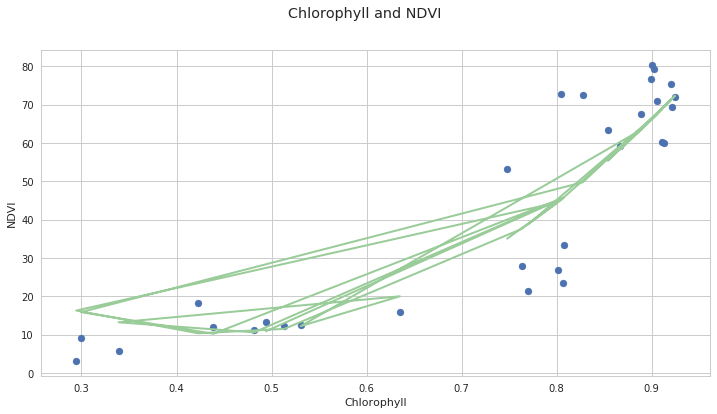

In [167]:
fig = plt.figure()
plt.scatter(ndvi, spad)
plt.plot(ndvi, model.predict(ndvi.reshape(-1, 1)), color="#99CC99", linewidth=2)
fig.suptitle("Chlorophyll and NDVI")
plt.xlabel("Chlorophyll")
plt.ylabel("NDVI")